In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('global_freelancers_raw.csv')
print(df.head)

<bound method NDFrame.head of     freelancer_ID             name  gender   age    country  language  \
0        FL250001  Ms. Nicole Kidd       f  52.0      Italy   Italian   
1        FL250002   Vanessa Garcia  FEMALE  52.0  Australia   English   
2        FL250003      Juan Nelson    male  53.0    Germany    German   
3        FL250004   Amanda Spencer       F  38.0  Australia   English   
4        FL250005  Lynn Curtis DDS  female  53.0    Germany    German   
..            ...              ...     ...   ...        ...       ...   
995      FL250996    Albert Wilcox    Male  56.0     Turkey   Turkish   
996      FL250997    Cheryl Norris       f  26.0    Germany    German   
997      FL250998    Kathy Watkins  female  37.0      Japan  Japanese   
998      FL250999      John Obrien       m  46.0     Russia   Russian   
999      FL251000       Dawn Green  Female  36.0     Mexico   Spanish   

              primary_skill  years_of_experience hourly_rate (USD)  rating  \
0    Blockchain

In [3]:
#descriptve statistics
print(df.describe())
print("--"*45)
print(df.isnull().sum())

              age  years_of_experience      rating
count  970.000000           949.000000  899.000000
mean    40.509278            11.340358    2.512570
std     11.942605             9.680610    1.546599
min     20.000000             0.000000    0.000000
25%     31.000000             3.000000    1.400000
50%     41.000000             9.000000    2.600000
75%     51.000000            17.000000    3.800000
max     60.000000            41.000000    5.000000
------------------------------------------------------------------------------------------
freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64


In [4]:
#Handling Null values
df['age']=df['age'].fillna(df['age'].mean())
df['years_of_experience']=df['years_of_experience'].fillna(df['years_of_experience'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mean())
df['is_active']=df['is_active'].fillna(0)
df['client_satisfaction']=df['client_satisfaction'].fillna('50%') 

print(df.head())

print(df.isnull().sum())


  freelancer_ID             name  gender   age    country language  \
0      FL250001  Ms. Nicole Kidd       f  52.0      Italy  Italian   
1      FL250002   Vanessa Garcia  FEMALE  52.0  Australia  English   
2      FL250003      Juan Nelson    male  53.0    Germany   German   
3      FL250004   Amanda Spencer       F  38.0  Australia  English   
4      FL250005  Lynn Curtis DDS  female  53.0    Germany   German   

            primary_skill  years_of_experience hourly_rate (USD)   rating  \
0  Blockchain Development                 11.0               100  2.51257   
1             Mobile Apps                 34.0           USD 100  3.30000   
2          Graphic Design                 31.0                50  0.00000   
3         Web Development                  4.0               $40  1.50000   
4         Web Development                 27.0                30  4.80000   

  is_active client_satisfaction  
0         0                 50%  
1         1                 84%  
2         N   

In [5]:

df['hourly_rate (USD)'] = df['hourly_rate (USD)'].replace({r'\$': '', r'USD': '', r'usd': ''}, regex=True)

# Convert to numeric safely
df['hourly_rate (USD)'] = pd.to_numeric(df['hourly_rate (USD)'], errors='coerce')

# Fill nulls with mode
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].fillna(df['hourly_rate (USD)'].mode()[0])
print(df.head())
print(df.isnull().sum())

  freelancer_ID             name  gender   age    country language  \
0      FL250001  Ms. Nicole Kidd       f  52.0      Italy  Italian   
1      FL250002   Vanessa Garcia  FEMALE  52.0  Australia  English   
2      FL250003      Juan Nelson    male  53.0    Germany   German   
3      FL250004   Amanda Spencer       F  38.0  Australia  English   
4      FL250005  Lynn Curtis DDS  female  53.0    Germany   German   

            primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0  Blockchain Development                 11.0              100.0  2.51257   
1             Mobile Apps                 34.0              100.0  3.30000   
2          Graphic Design                 31.0               50.0  0.00000   
3         Web Development                  4.0               40.0  1.50000   
4         Web Development                 27.0               30.0  4.80000   

  is_active client_satisfaction  
0         0                 50%  
1         1                 84%  
2       

In [6]:
print(df.dtypes)

freelancer_ID           object
name                    object
gender                  object
age                    float64
country                 object
language                object
primary_skill           object
years_of_experience    float64
hourly_rate (USD)      float64
rating                 float64
is_active               object
client_satisfaction     object
dtype: object


In [7]:
#Average hiurly rate
m=df.groupby('primary_skill')['hourly_rate (USD)'].mean()
print(m)

primary_skill
AI                        51.350000
Blockchain Development    49.047619
Cybersecurity             53.197674
Data Analysis             51.250000
DevOps                    52.723214
Graphic Design            48.548387
Machine Learning          51.559140
Mobile Apps               50.490196
UI/UX Design              51.788991
Web Development           52.884615
Name: hourly_rate (USD), dtype: float64


In [8]:
m=df.groupby('primary_skill')['years_of_experience'].mean()
print(m)

primary_skill
AI                         9.370000
Blockchain Development     9.200000
Cybersecurity             12.383721
Data Analysis              9.239583
DevOps                    10.160714
Graphic Design            11.989247
Machine Learning          11.301075
Mobile Apps               11.764706
UI/UX Design              10.366972
Web Development           12.240385
Name: years_of_experience, dtype: float64


In [9]:
m=df.groupby('primary_skill')['rating'].mean()
print(m)

primary_skill
AI                        2.427383
Blockchain Development    2.382389
Cybersecurity             2.475734
Data Analysis             2.435684
DevOps                    2.786724
Graphic Design            2.510759
Machine Learning          2.568823
Mobile Apps               2.542168
UI/UX Design              2.522941
Web Development           2.443516
Name: rating, dtype: float64


In [10]:
m=df.groupby('primary_skill')['age'].mean()
print(m)

primary_skill
AI                        41.595464
Blockchain Development    39.157585
Cybersecurity             42.058355
Data Analysis             39.218943
DevOps                    40.174356
Graphic Design            39.779670
Machine Learning          41.677619
Mobile Apps               40.157045
UI/UX Design              40.326114
Web Development           41.245460
Name: age, dtype: float64


In [11]:
print(df.is_active.unique())

['0' '1' 'N' 'False' 'True' 'yes' 'Y' 0 'no']


In [12]:
df['is_active'] = df['is_active'].replace({r'0': 'False', r'N':'False' , r'no': 'False'}, regex=True)

df['is_active'] = df['is_active'].replace({r'1': 'True', r'Y':'True' , r'yes': 'True'}, regex=True)
print(df['is_active'])
df['is_active']=df['is_active'].replace({0:'False'})
print(df.is_active.unique())

0      False
1       True
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998     True
999     True
Name: is_active, Length: 1000, dtype: object
['False' 'True']


In [13]:
print(df['gender'].unique()) 

['f' 'FEMALE' 'male' 'F' 'female' 'm' 'MALE' 'Female' 'M' 'Male']


In [14]:
df['gender']=df['gender'].replace({
    'f':'Female',
     'FEMALE':'Female',
    'F':'Female',
    'female':'Female',
    'm':'Male',
    'M':'Male',
    'MALE':'Male',
    'male':'Male'
})
print(df['gender'].unique())
print(df.head())

['Female' 'Male']
  freelancer_ID             name  gender   age    country language  \
0      FL250001  Ms. Nicole Kidd  Female  52.0      Italy  Italian   
1      FL250002   Vanessa Garcia  Female  52.0  Australia  English   
2      FL250003      Juan Nelson    Male  53.0    Germany   German   
3      FL250004   Amanda Spencer  Female  38.0  Australia  English   
4      FL250005  Lynn Curtis DDS  Female  53.0    Germany   German   

            primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0  Blockchain Development                 11.0              100.0  2.51257   
1             Mobile Apps                 34.0              100.0  3.30000   
2          Graphic Design                 31.0               50.0  0.00000   
3         Web Development                  4.0               40.0  1.50000   
4         Web Development                 27.0               30.0  4.80000   

  is_active client_satisfaction  
0     False                 50%  
1      True             

In [15]:
m=df.groupby('primary_skill')['freelancer_ID'].count()
print(m)

primary_skill
AI                        100
Blockchain Development    105
Cybersecurity              86
Data Analysis              96
DevOps                    112
Graphic Design             93
Machine Learning           93
Mobile Apps               102
UI/UX Design              109
Web Development           104
Name: freelancer_ID, dtype: int64


In [16]:
r=df.groupby('gender')['rating'].mean()
print(r)

gender
Female    2.473426
Male      2.550178
Name: rating, dtype: float64


In [17]:
c=df.groupby('country')["freelancer_ID"].count()
print(c)
print("--"*45)
print(df.groupby('years_of_experience')['rating'].mean())

country
Argentina         47
Australia         51
Brazil            31
Canada            65
China             49
Egypt             42
France            44
Germany           52
India             45
Indonesia         46
Italy             42
Japan             37
Mexico            50
Netherlands       51
Russia            47
South Africa      44
South Korea       68
Spain             45
Turkey            45
United Kingdom    50
United States     49
Name: freelancer_ID, dtype: int64
------------------------------------------------------------------------------------------
years_of_experience
0.0     2.611489
1.0     2.511919
2.0     2.335454
3.0     2.333344
4.0     2.646181
5.0     2.350687
6.0     2.457200
7.0     2.618343
8.0     2.647305
9.0     2.245961
10.0    2.350698
11.0    2.942737
12.0    2.592791
13.0    2.331603
14.0    1.793006
15.0    2.623673
16.0    2.654171
17.0    2.338694
18.0    2.674346
19.0    2.495841
20.0    2.511319
21.0    2.366384
22.0    2.760234
23.0    2.69000

In [18]:
print(pd.pivot_table(df,values='freelancer_ID',index='primary_skill',columns='gender',aggfunc='count'))
print("--"*45)
print(pd.pivot_table(df,values='is_active',index='country',columns='primary_skill',aggfunc='count'))
print("--"*45)

print(pd.pivot_table(df, values='client_satisfaction', index='country', columns='primary_skill', aggfunc='count'))


gender                  Female  Male
primary_skill                       
AI                          43    57
Blockchain Development      49    56
Cybersecurity               40    46
Data Analysis               41    55
DevOps                      54    58
Graphic Design              46    47
Machine Learning            44    49
Mobile Apps                 68    34
UI/UX Design                53    56
Web Development             52    52
------------------------------------------------------------------------------------------
primary_skill    AI  Blockchain Development  Cybersecurity  Data Analysis  \
country                                                                     
Argentina       6.0                     4.0            2.0            3.0   
Australia       4.0                     6.0            5.0            4.0   
Brazil          2.0                     2.0            3.0            1.0   
Canada          5.0                     8.0           13.0            4.0   
Chi

In [19]:
#One hot encoding

df_encoded = pd.get_dummies(df, columns=['gender', 'country', 'language', 'primary_skill', 'is_active', 'client_satisfaction'], drop_first=True)
print(df.columns)
print(df.head())

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')
  freelancer_ID             name  gender   age    country language  \
0      FL250001  Ms. Nicole Kidd  Female  52.0      Italy  Italian   
1      FL250002   Vanessa Garcia  Female  52.0  Australia  English   
2      FL250003      Juan Nelson    Male  53.0    Germany   German   
3      FL250004   Amanda Spencer  Female  38.0  Australia  English   
4      FL250005  Lynn Curtis DDS  Female  53.0    Germany   German   

            primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0  Blockchain Development                 11.0              100.0  2.51257   
1             Mobile Apps                 34.0              100.0  3.30000   
2          Graphic Design                 31.0               50.0  0.00000   
3         Web Development                  4.0     

In [20]:
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender_label']=le.fit_transform(df['gender'])
print(df['Gender_label'])
print(le.classes_)  # Output: ['Female', 'Male', 'Other']


0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    0
997    0
998    1
999    0
Name: Gender_label, Length: 1000, dtype: int64
['Female' 'Male']


In [21]:
df['is_active_label']=le.fit_transform(df['is_active'])
print(df['is_active_label'])
print(le.classes_)

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    1
Name: is_active_label, Length: 1000, dtype: int64
['False' 'True']


In [22]:
df['country_label']=le.fit_transform(df['country'])
print(df['country_label'])
print(le.classes_)

0      10
1       1
2       7
3       1
4       7
       ..
995    18
996     7
997    11
998    14
999    12
Name: country_label, Length: 1000, dtype: int64
['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'Egypt' 'France'
 'Germany' 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Netherlands'
 'Russia' 'South Africa' 'South Korea' 'Spain' 'Turkey' 'United Kingdom'
 'United States']


In [23]:
df['language_label']=le.fit_transform(df['language'])
print(df['language_label'])
print(le.classes_)

0       8
1       3
2       5
3       3
4       5
       ..
995    15
996     5
997     9
998    13
999    14
Name: language_label, Length: 1000, dtype: int64
['Afrikaans' 'Arabic' 'Dutch' 'English' 'French' 'German' 'Hindi'
 'Indonesian' 'Italian' 'Japanese' 'Korean' 'Mandarin' 'Portuguese'
 'Russian' 'Spanish' 'Turkish']


In [24]:
df['primary_skill_label']=le.fit_transform(df['primary_skill'])
print(df['primary_skill_label'])
print(le.classes_)

0      1
1      7
2      5
3      9
4      9
      ..
995    4
996    1
997    3
998    6
999    8
Name: primary_skill_label, Length: 1000, dtype: int64
['AI' 'Blockchain Development' 'Cybersecurity' 'Data Analysis' 'DevOps'
 'Graphic Design' 'Machine Learning' 'Mobile Apps' 'UI/UX Design'
 'Web Development']


In [25]:
#Visulizations
print(df.columns.tolist())

['freelancer_ID', 'name', 'gender', 'age', 'country', 'language', 'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating', 'is_active', 'client_satisfaction', 'Gender_label', 'is_active_label', 'country_label', 'language_label', 'primary_skill_label']


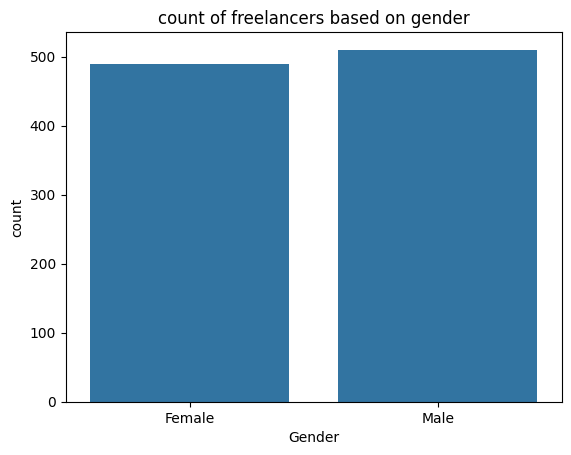

In [26]:
sns.countplot(x='gender',data=df)
plt.title('count of freelancers based on gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.savefig('visulization_Freelancer.png')
plt.show()

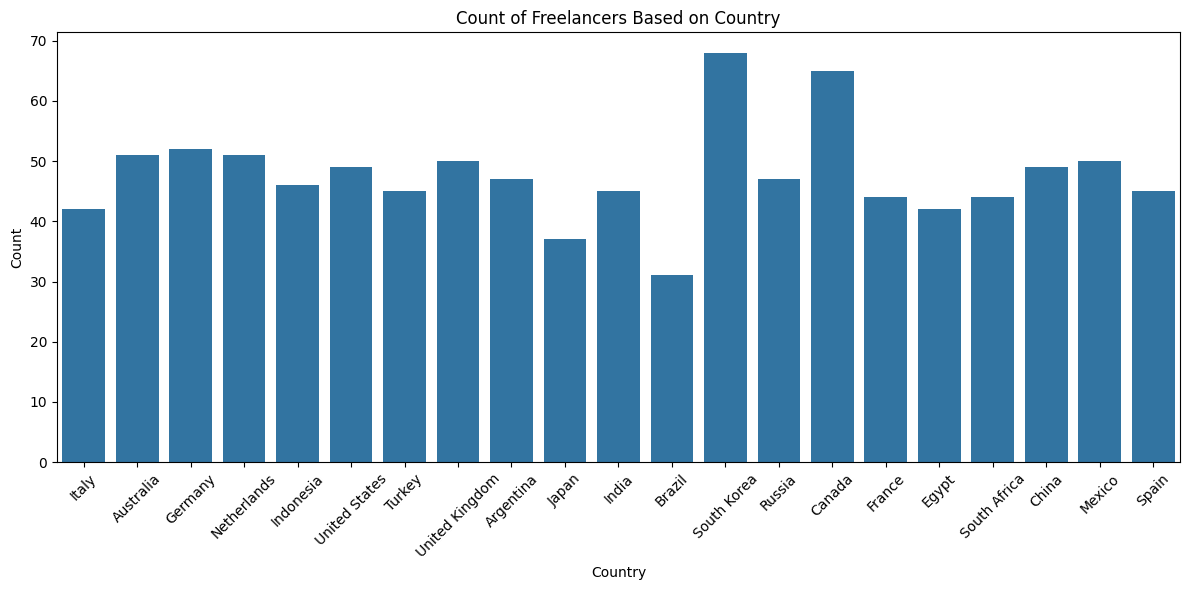

In [27]:





plt.figure(figsize=(12, 6))  # ✅ Set the size before plotting

sns.countplot(x='country', data=df)

plt.title('Count of Freelancers Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.xticks(rotation=45)  # ✅ Optional: improve readability
plt.tight_layout()       # ✅ Prevent label cut-off

plt.savefig('visualization_Freelancer.png')  # ✅ Save AFTER setting everything
plt.show()


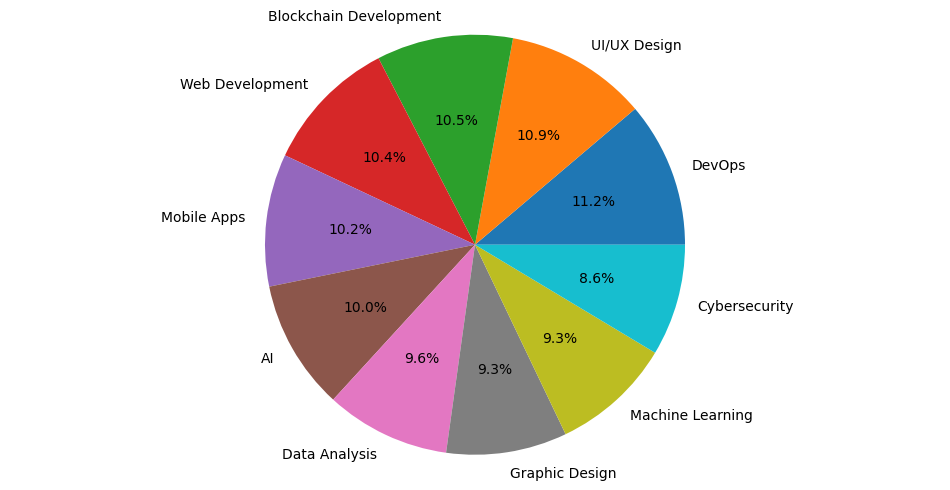

In [28]:
primary_skill = df['primary_skill'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(primary_skill,labels=primary_skill.index,autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('visualization_Freelancer.png')
plt.show()

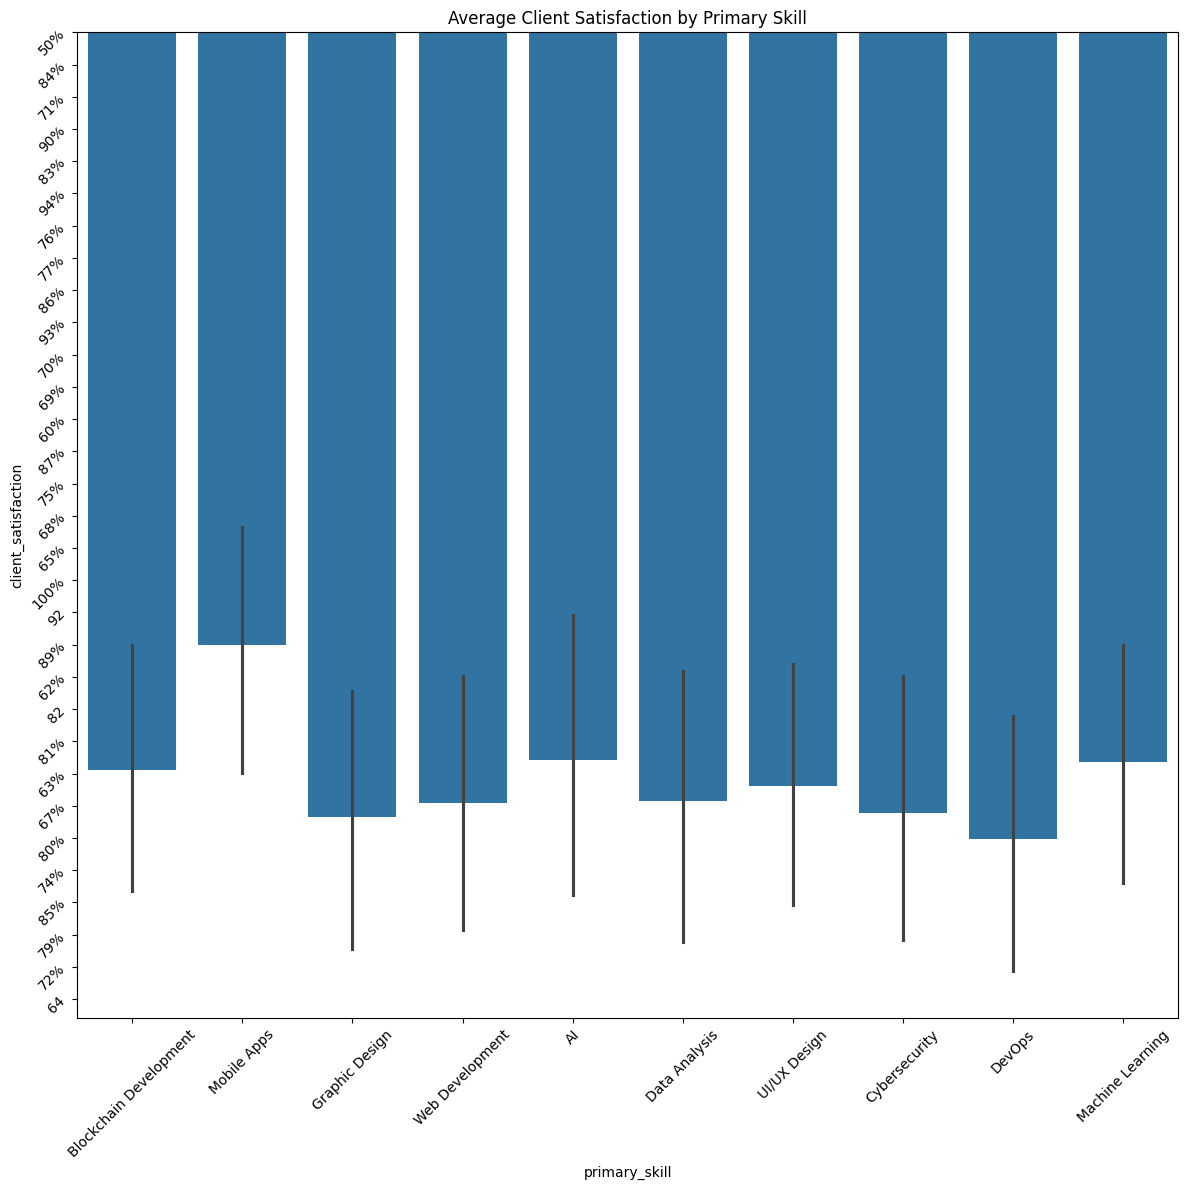

In [29]:
plt.figure(figsize=(12,12))
sns.barplot(x='primary_skill', y='client_satisfaction', data=df)

plt.title("Average Client Satisfaction by Primary Skill")
plt.xticks(rotation=45)
plt.yticks(rotation=45)# rotate x-axis labels for better visibility
plt.tight_layout()
plt.savefig('visulization_Freelancer.png')
plt.show()

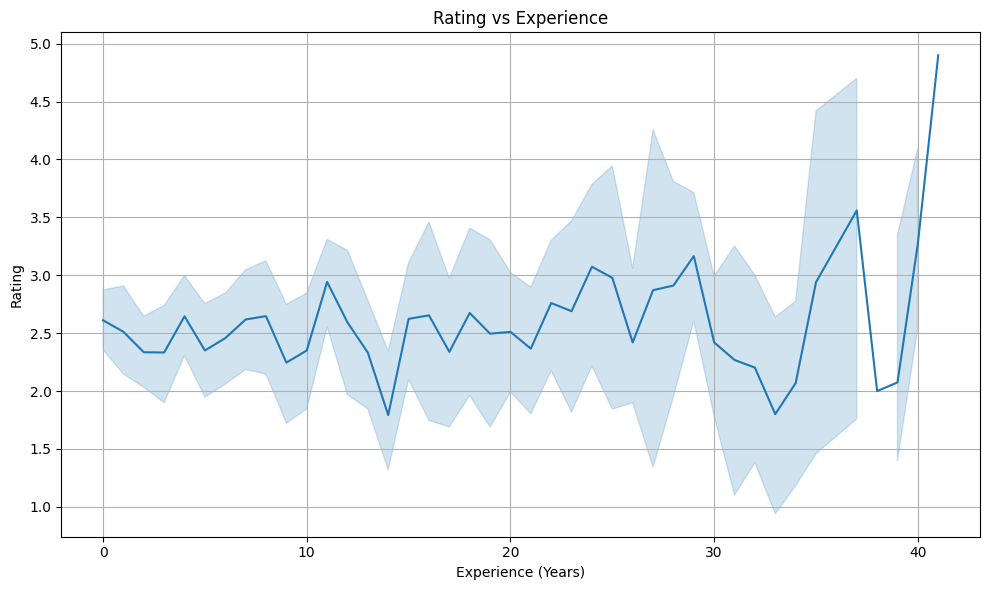

In [30]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='years_of_experience', y='rating', data=df)

plt.title("Rating vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

f=['Gender_label','age','years_of_experience','hourly_rate (USD)', 'rating','primary_skill_label', 'country_label', 'language_label']
X=df[f]
y=df['is_active_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Train model
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.57

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.86      0.70       118
           1       0.43      0.15      0.22        82

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.46       200
weighted avg       0.53      0.57      0.50       200


Confusion Matrix:
 [[102  16]
 [ 70  12]]


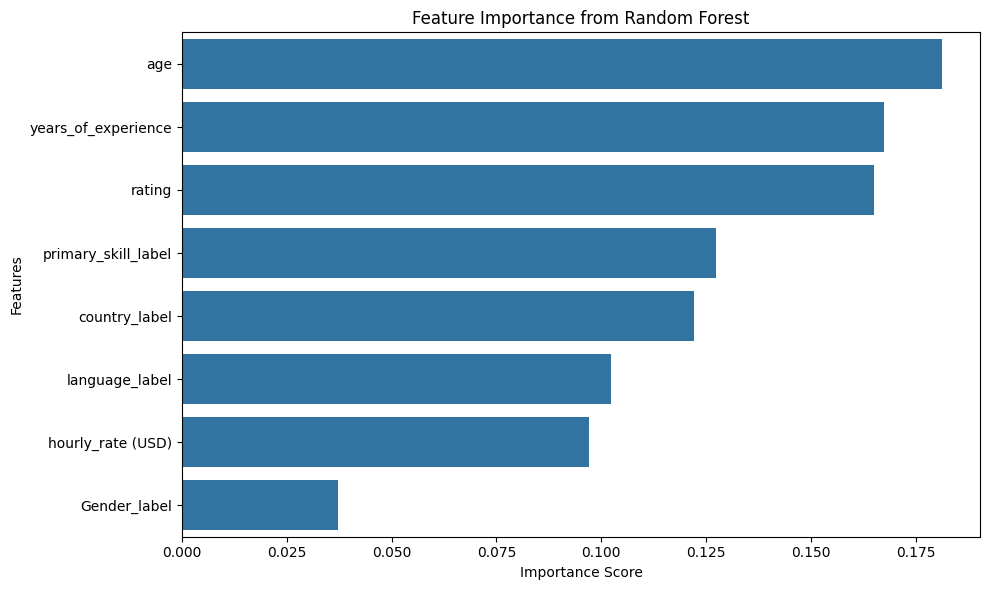

In [34]:


from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

f=['Gender_label','age','years_of_experience','hourly_rate (USD)', 'rating','primary_skill_label', 'country_label', 'language_label']
X=df[f]
y=df['is_active_label']

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())